# Analyzing DMart Product

# import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True) #Turning on notebook mode 
cf.go_offline()

# Load the data

In [3]:
df=pd.read_csv(r"DMart.csv")

# check/view the data 

In [4]:
df.head()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Grocery/Dry Fruits,500 gm,India,Grocery > Grocery/Dry Fruits
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Grocery/Dry Fruits,100 gm,India,Grocery > Grocery/Dry Fruits
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Grocery/Dry Fruits,200 gm,India,Grocery > Grocery/Dry Fruits
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,500 gm,USA,Grocery > Dry Fruits
4,Nutraj California Almonds (Badam),Nutraj,1549.0,659.0,Grocery,Dry Fruits,1 kg,USA,Grocery > Dry Fruits


In [5]:
df.tail()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
5184,Navneet Youva A4 Notebook - Assorted,Navneet,55.0,36.0,School Supplies,School Needs,1 Book,OverviewEach book has an index page with label...,School Supplies > School Needs
5185,Navneet Youva Longbook Journal - Assorted,Navneet,85.0,69.0,School Supplies,School Needs,1 Book,OverviewStrong & sturdy case binding. Easy to ...,School Supplies > School Needs
5186,Navneet Youva Long Notebook - Assorted,Navneet,55.0,40.0,School Supplies,School Needs,1 Book,OverviewAttractive colour and designs. Easy to...,School Supplies > School Needs
5187,Navneet Youva Drawing Book - Assorted,Navneet,110.0,72.0,School Supplies,School Needs,1 Book,OverviewDrawing book has attractive cover desi...,School Supplies > School Needs
5188,Navneet Youva Canvas Board (10x12 Inches),Navneet,90.0,75.0,School Supplies,School Needs,1 U,OverviewCoated with a double layer of acrylic ...,School Supplies > School Needs


In [6]:
df.shape

(5189, 9)

In [7]:
df.describe()

,Price,DiscountedPrice
count,5188.000000,5188.000000
mean,344.030360,236.669719
std,601.034092,387.198716
min,0.000000,0.000000
25%,85.000000,64.000000
50%,175.000000,125.000000
75%,345.000000,249.000000
max,10990.000000,7999.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             5188 non-null   object 
 1   Brand            4789 non-null   object 
 2   Price            5188 non-null   float64
 3   DiscountedPrice  5188 non-null   float64
 4   Category         5186 non-null   object 
 5   SubCategory      5186 non-null   object 
 6   Quantity         5188 non-null   object 
 7   Description      5187 non-null   object 
 8   BreadCrumbs      5186 non-null   object 
dtypes: float64(2), object(7)
memory usage: 365.0+ KB


# Data Cleaning 

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5184    False
5185    False
5186    False
5187    False
5188    False
Length: 5189, dtype: bool

In [10]:
df.isnull().sum()

Name                 1
Brand              400
Price                1
DiscountedPrice      1
Category             3
SubCategory          3
Quantity             1
Description          2
BreadCrumbs          3
dtype: int64

In [11]:
df['Name'] = df['Name'].fillna('Kitchen Appliance')

In [12]:
df['Brand'] = df['Brand'].fillna('Local/Unknown')

In [13]:
df[df['Price'].isnull()==True]

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
4323,Elle 18 Nail Pops Nail Colour - Shade 125,Elle 18,NaN,NaN,Personal Care,Personal Care/Nail Care,5 ml,NaN,Personal Care > Personal Care/Nail Care


In [14]:
df['Price']=df['Price'].fillna(df[df['SubCategory']=='Personal Care/Nail Care']['Price'].mean())

In [15]:
df['DiscountedPrice']=df['DiscountedPrice'].fillna(df[df['SubCategory']=='Personal Care/Nail Care']['DiscountedPrice'].mean())

In [16]:
df[df['Category'].isnull()==True]

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
3180,Stainless Steel Idli Maker with Lid,Keyur Kitchenware,900.0,499.0,NaN,NaN,1 Unit,\n- Container Material : Stainless Steel\n- Ha...,NaN
3243,Pigeon ESS Non-Stick Gift Set - Red,Pigeon,2895.0,1359.0,NaN,NaN,7 pcs,\n-Specifications :\n- Coating : 5 Layers Non-...,NaN
3245,Wonderchef Milano Set - Red,Wonderchef,4200.0,1999.0,NaN,NaN,4 Pcs,\n- Adorn your kitchen with this beautiful Mil...,NaN


In [17]:
df['Category'] = df['Category'].fillna('Home & Kitchen')

In [18]:
df['SubCategory'] = df['SubCategory'].fillna('Home Appliances')

In [19]:
df['BreadCrumbs']=df['BreadCrumbs'].fillna('Home & Kitchen > Cookware & Serveware')

In [20]:
df[df.Quantity.isnull()==True]

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
5047,Zeel MT212 Men's Raincoat - Navy Blue : Size XXL,Zeel,1199.0,1049.0,Raincoat,Raincoat,NaN,Specifications- Material : Fabric- Colour : Na...,Raincoat


In [21]:
df['Quantity'] = df['Quantity'].fillna('Size XXL')

In [22]:
df['Description'] = df['Description'].fillna('No Desciption')

In [23]:
df.isnull().sum()

Name               0
Brand              0
Price              0
DiscountedPrice    0
Category           0
SubCategory        0
Quantity           0
Description        0
BreadCrumbs        0
dtype: int64

In [24]:
df['DiscountPercent'] = (df['Price']-df['DiscountedPrice'])*100/df['Price']

In [25]:
df.isnull().sum()

Name               0
Brand              0
Price              0
DiscountedPrice    0
Category           0
SubCategory        0
Quantity           0
Description        0
BreadCrumbs        0
DiscountPercent    1
dtype: int64

In [26]:
df[df['DiscountPercent'].isnull()==True]

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs,DiscountPercent
2230,Kopiko Cappuccino Coffee Candies,Kopiko,0.0,0.0,Packaged Food,Sweets,140 gm,OverviewKopiko candy is made from real coffee ...,Packaged Food > Sweets,NaN


In [27]:
df['DiscountPercent'] = df['DiscountPercent'].fillna(0)

In [28]:
df['DiscountPercent']=df['DiscountPercent'].apply(lambda x:int(x))

In [29]:
df.head()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs,DiscountPercent
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Grocery/Dry Fruits,500 gm,India,Grocery > Grocery/Dry Fruits,27
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Grocery/Dry Fruits,100 gm,India,Grocery > Grocery/Dry Fruits,22
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Grocery/Dry Fruits,200 gm,India,Grocery > Grocery/Dry Fruits,13
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,500 gm,USA,Grocery > Dry Fruits,41
4,Nutraj California Almonds (Badam),Nutraj,1549.0,659.0,Grocery,Dry Fruits,1 kg,USA,Grocery > Dry Fruits,57


In [30]:
df['SubCategory'].unique()
df['SubCategory'] = df['SubCategory'].apply(lambda x: x.split('/')[-1])
df['SubCategory'].unique()

array(['Dry Fruits', 'Dals', 'Pulses', 'Masala & Spices', ' Jaggery',
       'Ghee & Vanaspati', 'Rice & Rice Products', 'Flours & Grains',
       'Cooking Oil', 'Hair Care', 'Gourmet Food', 'Pickles',
       'Snacks & Farsans', 'Beverages', 'DMart Grocery', 'Dairy',
       'Biscuits & Cookies', 'Bakery', 'Personal Care', 'Ready To Cook',
       'Breakfast Cereals', 'Packaged Food', 'Sweets', 'Ketchup & Sauce',
       'Jams & Spreads', 'Pasta & Noodles', 'Fruits & Vegetables',
       'Detergent & Fabric Care', 'Cleaners', 'Specials',
       'Home & Kitchen', 'Cleaning Tools', 'Freshener & Repellents',
       'Bed & Bath', 'Furniture & Décor', 'Disinfectants',
       'Tissue Paper & Napkins', 'Kitchen Aprons', 'Home Appliances',
       'Wonderchef', 'Water Purifiers & Accessories', 'Home Utility',
       'Tableware', 'Butterfly', 'Cookware & Serveware',
       'Festive Specials', 'Joyo Plastics', 'Pooja Needs', 'Geep',
       'Zebronics', 'Skin Care', 'Face Care', 'Eye Makeup', 'Lip Car

In [31]:
df.head()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs,DiscountPercent
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Dry Fruits,500 gm,India,Grocery > Grocery/Dry Fruits,27
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Dry Fruits,100 gm,India,Grocery > Grocery/Dry Fruits,22
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Dry Fruits,200 gm,India,Grocery > Grocery/Dry Fruits,13
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,500 gm,USA,Grocery > Dry Fruits,41
4,Nutraj California Almonds (Badam),Nutraj,1549.0,659.0,Grocery,Dry Fruits,1 kg,USA,Grocery > Dry Fruits,57


In [32]:
df.BreadCrumbs.unique()
df.head()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs,DiscountPercent
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Dry Fruits,500 gm,India,Grocery > Grocery/Dry Fruits,27
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Dry Fruits,100 gm,India,Grocery > Grocery/Dry Fruits,22
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Dry Fruits,200 gm,India,Grocery > Grocery/Dry Fruits,13
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,500 gm,USA,Grocery > Dry Fruits,41
4,Nutraj California Almonds (Badam),Nutraj,1549.0,659.0,Grocery,Dry Fruits,1 kg,USA,Grocery > Dry Fruits,57


In [33]:
df['BreadCrumbs'] = df.BreadCrumbs.apply(lambda x:x.split('>')[-1]).apply(lambda x:x.split('/')[-1])
df.head()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs,DiscountPercent
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Dry Fruits,500 gm,India,Dry Fruits,27
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Dry Fruits,100 gm,India,Dry Fruits,22
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Dry Fruits,200 gm,India,Dry Fruits,13
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,500 gm,USA,Dry Fruits,41
4,Nutraj California Almonds (Badam),Nutraj,1549.0,659.0,Grocery,Dry Fruits,1 kg,USA,Dry Fruits,57


In [34]:
df[['SubCategory','BreadCrumbs']].tail(100)

,SubCategory,BreadCrumbs
5089,School Needs,School Needs
5090,Jaggery,Jaggery
5091,Jaggery,Jaggery
5092,Personal Hygiene,Personal Hygiene
5093,School Needs,School Needs
...,...,...
5184,School Needs,School Needs
5185,School Needs,School Needs
5186,School Needs,School Needs
5187,School Needs,School Needs


In [35]:
df.drop(['BreadCrumbs'],axis=1,inplace=True)
df.head()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,DiscountPercent
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Dry Fruits,500 gm,India,27
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Dry Fruits,100 gm,India,22
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Dry Fruits,200 gm,India,13
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,500 gm,USA,41
4,Nutraj California Almonds (Badam),Nutraj,1549.0,659.0,Grocery,Dry Fruits,1 kg,USA,57


# Visualization

Distribution of Price


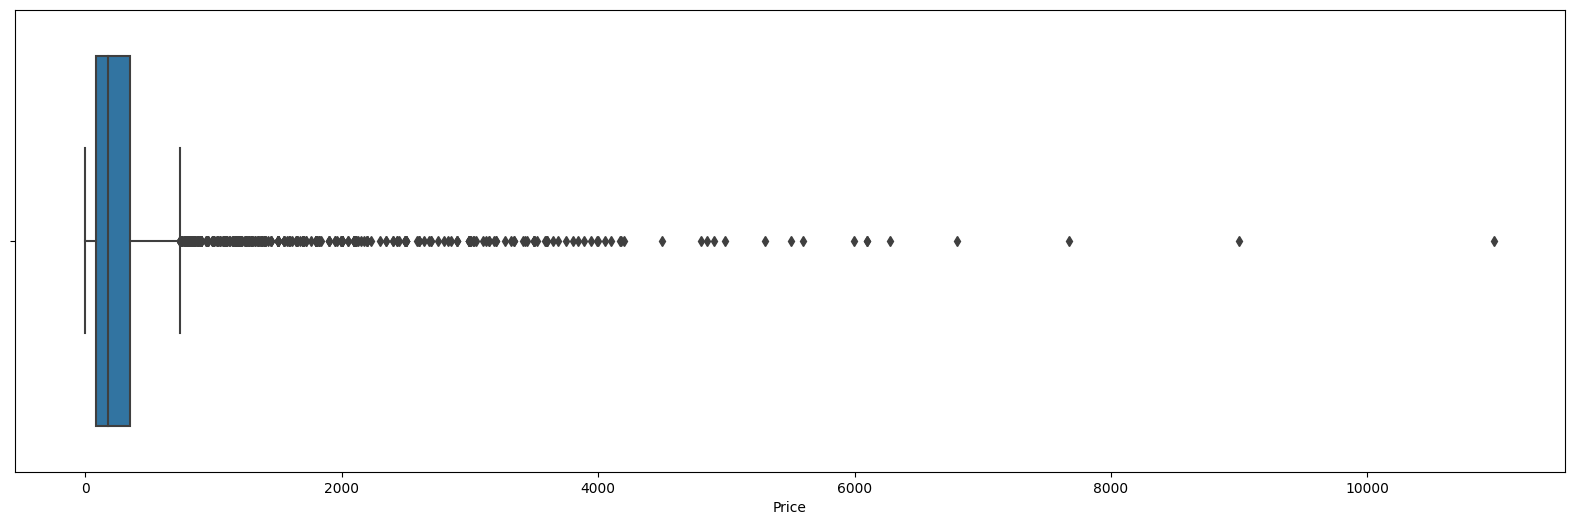

Distribution of DiscountedPrice


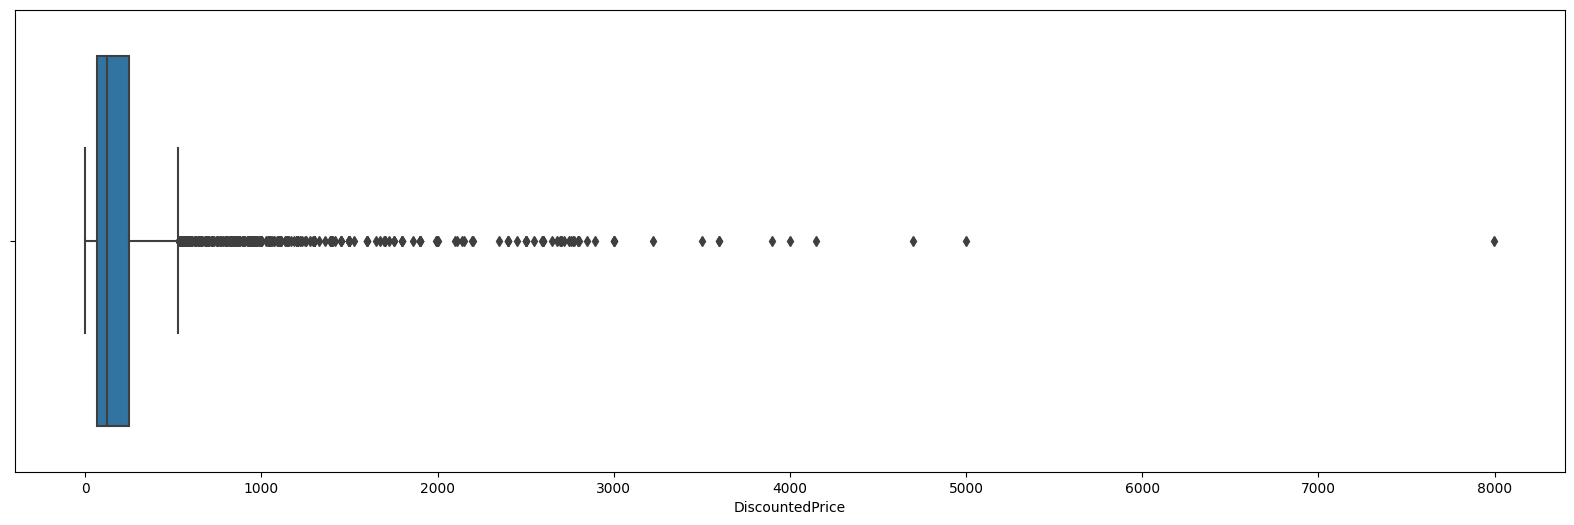

Distribution of DiscountPercent


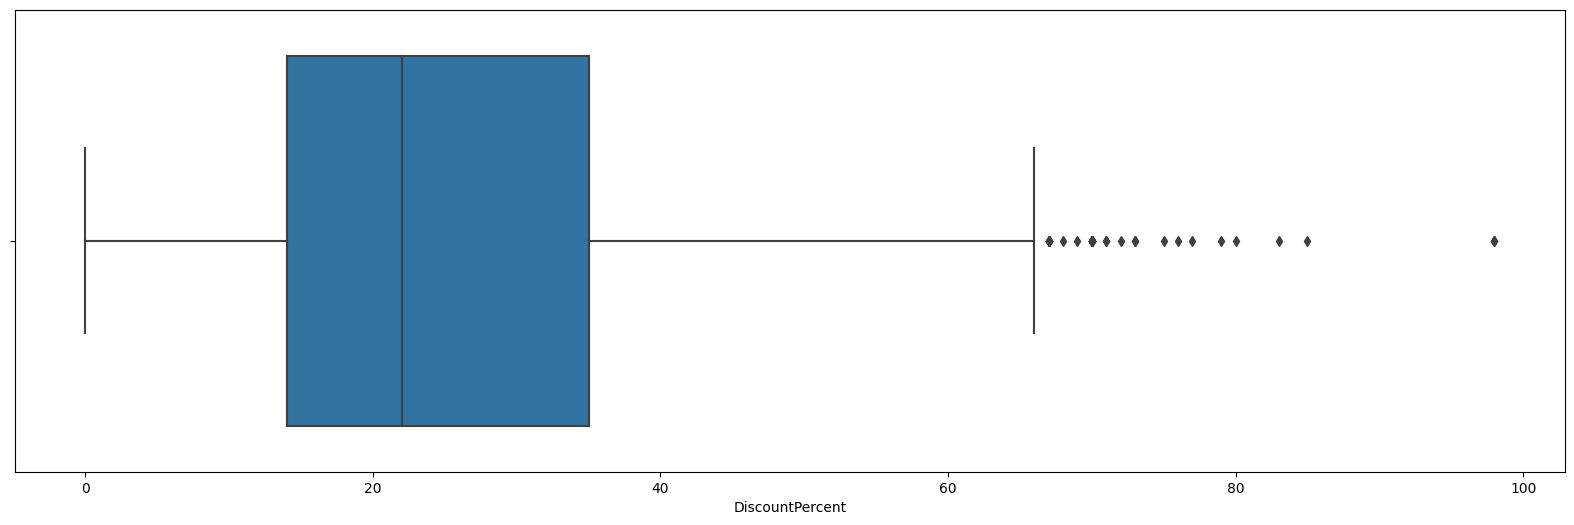

In [36]:
#Distribution of price and discount price
cols = ['Price','DiscountedPrice','DiscountPercent']

for i in cols:
    print('Distribution of',i)
    plt.figure(figsize=(20,6))
    sns.boxplot(x = df[i])
    plt.show()

Text(0, 0.5, 'Number of Products')

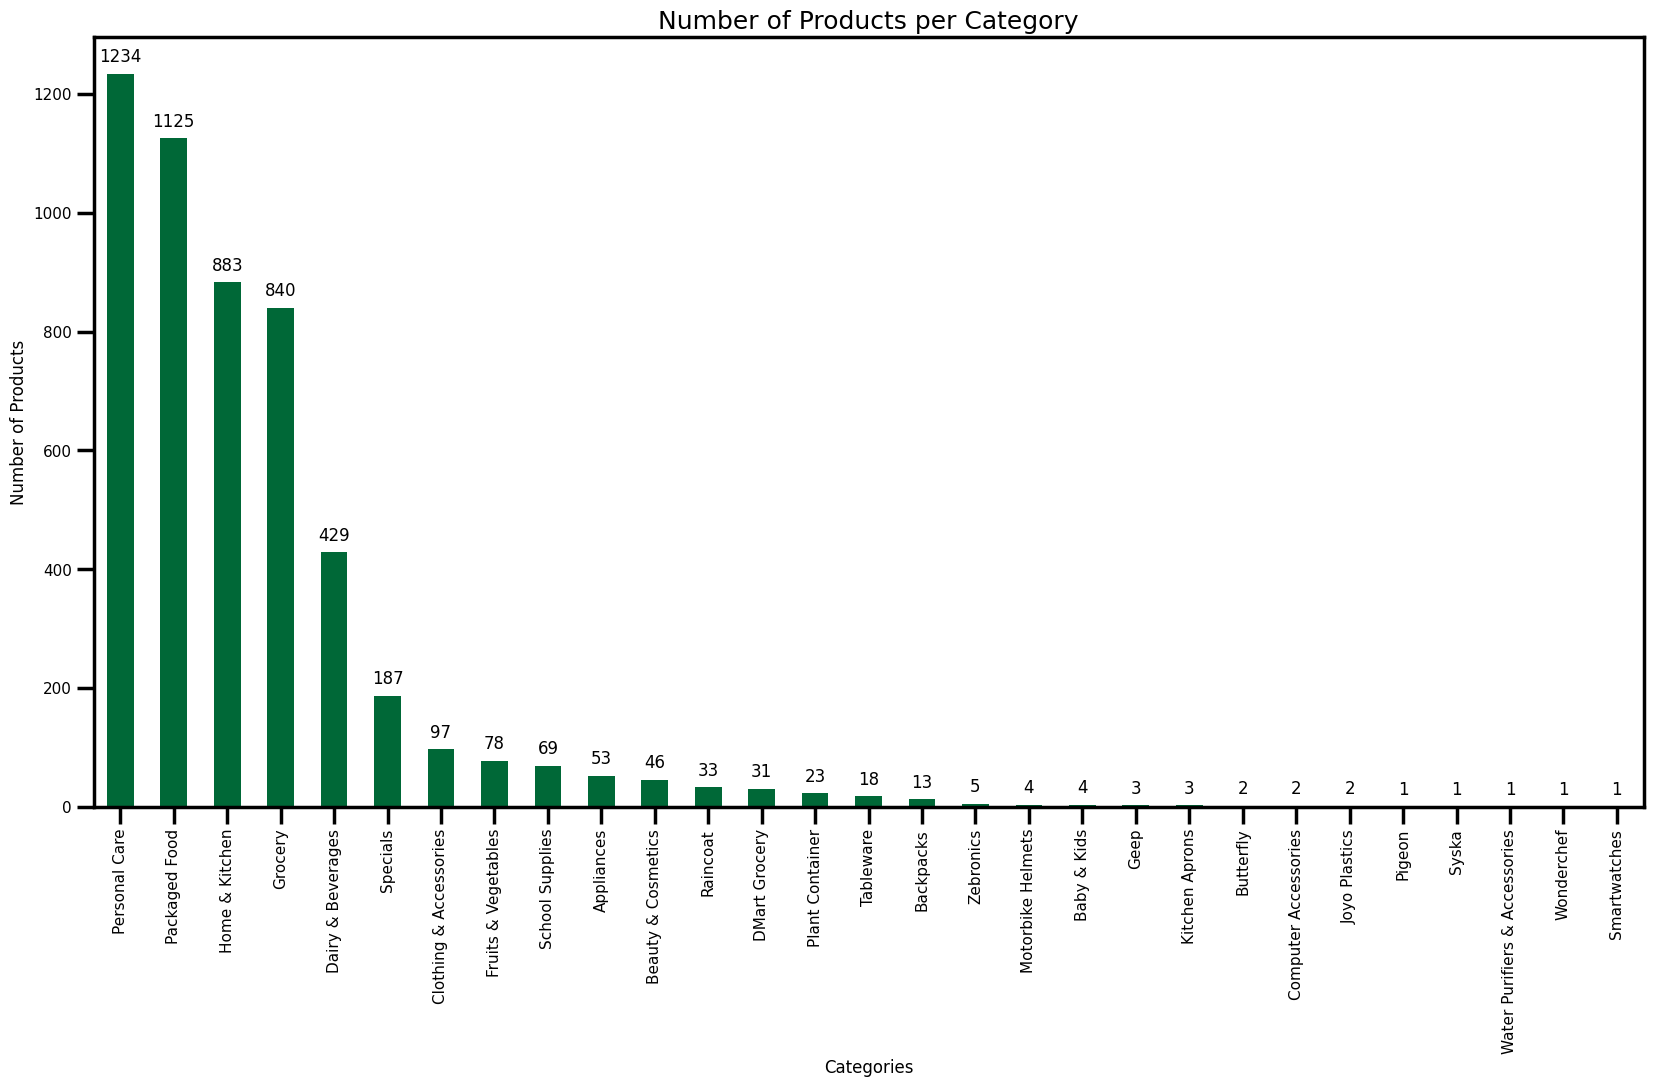

In [37]:
# Analysis on the basis of Category and Sub Category
sns.set_context("poster",font_scale=0.5)
plt.figure(figsize=(20,10))
ax = df.Category.value_counts().plot(kind='bar',cmap='RdYlGn_r')

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+20),ha='center',color='black')
    
plt.title('Number of Products per Category',fontsize=18)
plt.xlabel('Categories')
plt.ylabel('Number of Products')

In [38]:
#Number of SubCategories,Brands and Products per Categoriy
df.groupby("Category")[['SubCategory','Brand','Name']].nunique().rename(columns={"Name":'Number of Products'})

,SubCategory,Brand,Number of Products
Category,,,
Appliances,3,19,52
Baby & Kids,1,2,4
Backpacks,1,5,13
Beauty & Cosmetics,2,11,42
Butterfly,1,1,1
Clothing & Accessories,2,9,42
Computer Accessories,1,1,2
DMart Grocery,2,3,21
Dairy & Beverages,2,106,338


In [39]:
#Avg Discount on Each Category
df.DiscountPercent.mean()
df.groupby('Category')['DiscountPercent'].mean().sort_values(ascending=False)

Category
Geep                             61.333333
Smartwatches                     58.000000
Butterfly                        57.000000
Zebronics                        56.400000
Backpacks                        51.461538
Wonderchef                       49.000000
Pigeon                           49.000000
Syska                            43.000000
Computer Accessories             37.500000
Joyo Plastics                    36.500000
Specials                         32.326203
Clothing & Accessories           32.123711
Appliances                       31.113208
Plant Container                  30.521739
Beauty & Cosmetics               28.891304
Home & Kitchen                   28.676104
Packaged Food                    28.369778
Personal Care                    25.570502
DMart Grocery                    24.483871
Kitchen Aprons                   24.000000
Fruits & Vegetables              21.974359
Grocery                          21.438095
Dairy & Beverages                21.046620
Ta

Text(0, 0.5, 'Number of Products')

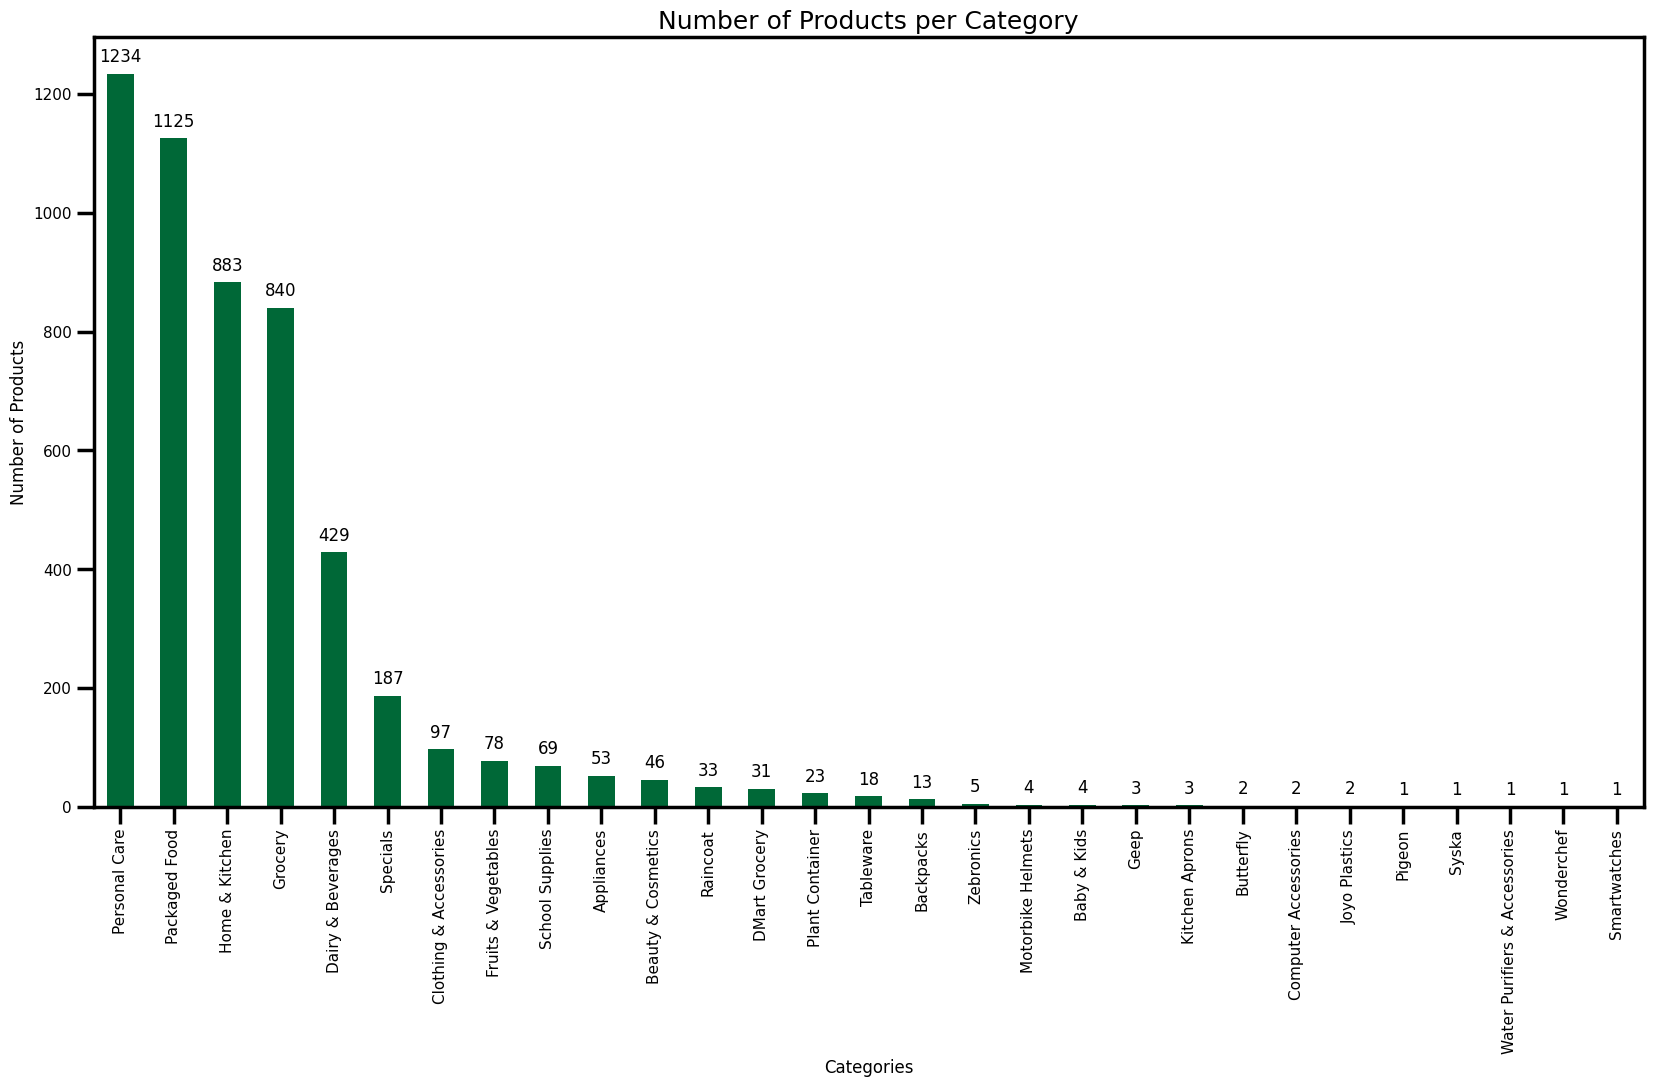

In [40]:
sns.set_context("poster",font_scale=0.5)
plt.figure(figsize=(20,10))
ax = df.Category.value_counts().plot(kind='bar',cmap='RdYlGn_r')

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+20),ha='center',color='black')
    
plt.title('Number of Products per Category',fontsize=18)
plt.xlabel('Categories')
plt.ylabel('Number of Products')

In [41]:
#Number of SubCategories,Brands and Products per Categoriy
df.groupby("Category")[['SubCategory','Brand','Name']].nunique().rename(columns={"Name":'Number of Products'})

,SubCategory,Brand,Number of Products
Category,,,
Appliances,3,19,52
Baby & Kids,1,2,4
Backpacks,1,5,13
Beauty & Cosmetics,2,11,42
Butterfly,1,1,1
Clothing & Accessories,2,9,42
Computer Accessories,1,1,2
DMart Grocery,2,3,21
Dairy & Beverages,2,106,338


In [42]:
#Clothing Category as it's my fav
clothing = df[df['Category']=='Clothing & Accessories']
clothing.SubCategory.value_counts()


SubCategory
Men's      50
Women's    47
Name: count, dtype: int64

In [44]:
clothing.groupby('SubCategory')['DiscountPercent'].mean()


SubCategory
Men's      23.680000
Women's    41.106383
Name: DiscountPercent, dtype: float64

Text(0, 0.5, 'Avg.DiscountedPrice')

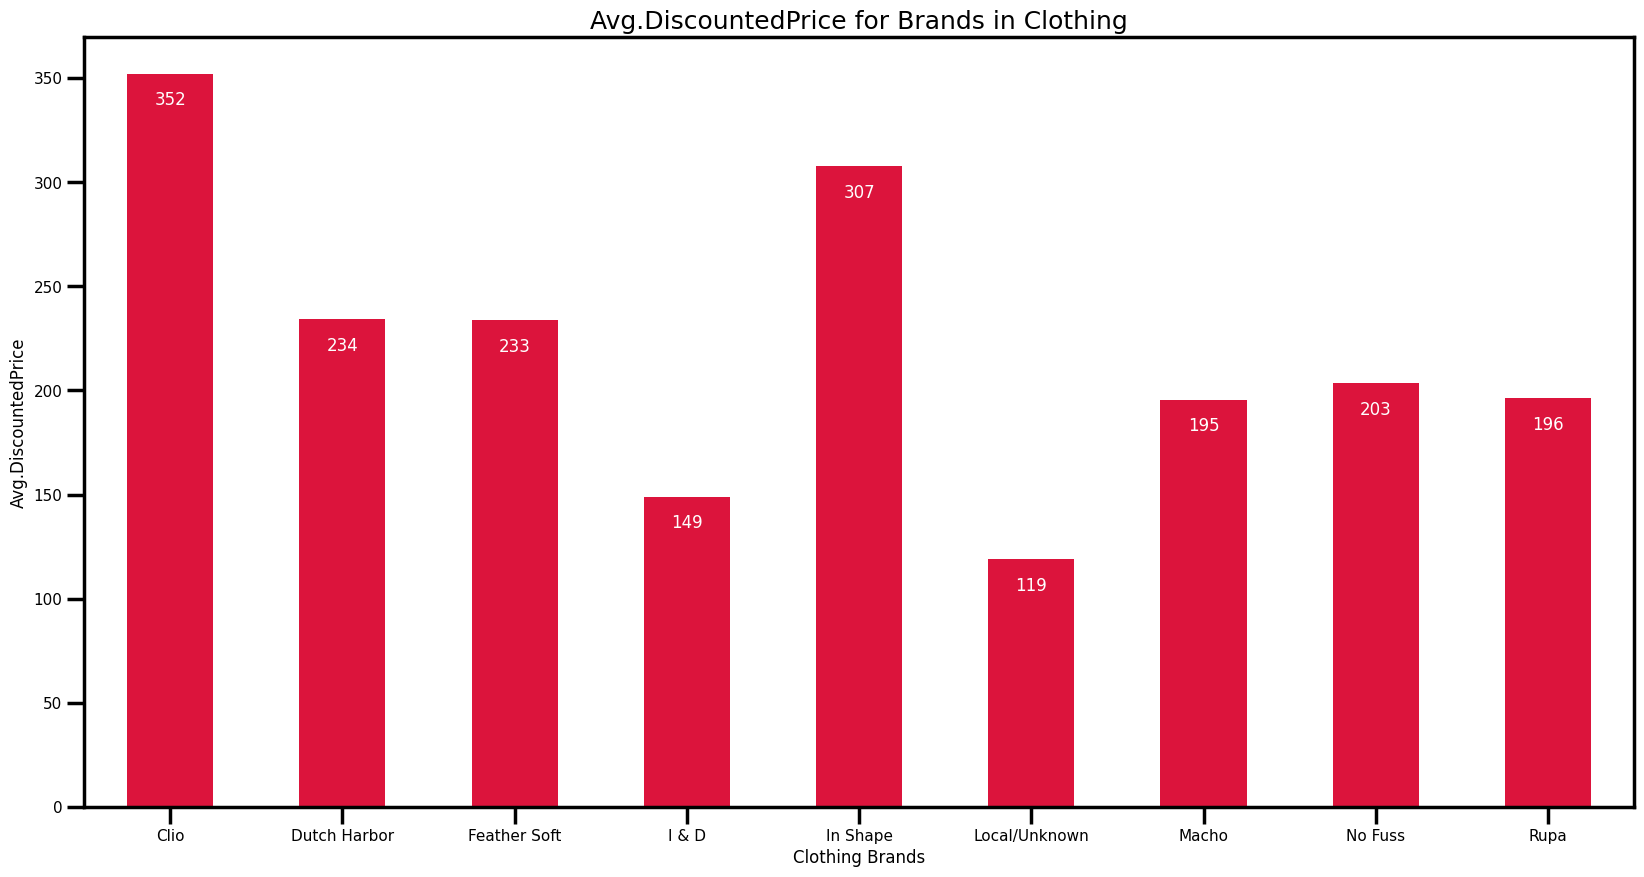

In [45]:
sns.set_context("poster",font_scale=0.5)
plt.figure(figsize=(20,10))
ax = clothing.groupby('Brand')['DiscountedPrice'].mean().plot(kind='bar',color='crimson',rot=0)

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()-15),ha='center',color='white')
    
plt.title('Avg.DiscountedPrice for Brands in Clothing',fontsize=18)
plt.xlabel('Clothing Brands')
plt.ylabel('Avg.DiscountedPrice')

In [46]:
#Women Clothing with more than 50% discount
clothing[(clothing['SubCategory']=="Women's")&(clothing['DiscountPercent']>50)]

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,DiscountPercent
4858,Feather Soft Navy Blue Ankle Length Legging - ...,Feather Soft,499.0,149.0,Clothing & Accessories,Women's,Size M,\n- Brand Name : Feather Soft\n- Colour : Navy...,70
4859,Feather Soft Navy Blue Ankle Length Legging - ...,Feather Soft,499.0,149.0,Clothing & Accessories,Women's,Size L,\n- Brand Name : Feather Soft\n- Colour : Navy...,70
4862,Feather Soft Red Ankle Length Legging - 1 Unit,Feather Soft,499.0,149.0,Clothing & Accessories,Women's,Size M,\n- Brand Name : Feather Soft\n- Colour : Red\...,70
4863,Feather Soft Red Ankle Length Legging - 1 Unit,Feather Soft,499.0,149.0,Clothing & Accessories,Women's,Size L,\n- Brand Name : Feather Soft\n- Colour : Red\...,70
4865,Feather Soft Red Ankle Length Legging - 1 Unit,Feather Soft,499.0,149.0,Clothing & Accessories,Women's,Size XXL,\n- Brand Name : Feather Soft\n- Colour : Red\...,70
4866,Feather Soft Skin Color Ankle Length Legging -...,Feather Soft,499.0,149.0,Clothing & Accessories,Women's,Size M,\n- Brand Name : Feather Soft\n- Colour : Skin...,70
4867,Feather Soft Skin Color Ankle Length Legging -...,Feather Soft,499.0,149.0,Clothing & Accessories,Women's,Size L,\n- Brand Name : Feather Soft\n- Colour : Skin...,70
4868,Feather Soft Skin Color Ankle Length Legging -...,Feather Soft,499.0,149.0,Clothing & Accessories,Women's,Size XL,\n- Brand Name : Feather Soft\n- Colour : Skin...,70
4869,Feather Soft Skin Color Ankle Length Legging -...,Feather Soft,499.0,149.0,Clothing & Accessories,Women's,Size XXL,\n- Brand Name : Feather Soft\n- Colour : Skin...,70
4870,Feather Soft Skin Color Ankle Length Legging -...,Feather Soft,499.0,149.0,Clothing & Accessories,Women's,Size XXXL,Unique Features :Skin friendly magical soft to...,70


In [47]:
df[df['Category']=='Personal Care'].groupby(['SubCategory','Brand'])['Name'].count().reset_index()


,SubCategory,Brand,Name
0,Baby & Kids,Friends,4
1,Baby & Kids,Himalaya,11
2,Baby & Kids,Huggies,9
3,Baby & Kids,Johnson's,5
4,Baby & Kids,Little's,1
...,...,...,...
246,Skin Care,Yardley,2
247,Tissue Paper & Napkins,Cleanplus,1
248,Tissue Paper & Napkins,Fresh Ones,1
249,Tissue Paper & Napkins,Origami,3


In [48]:
df[df['Category']=='Personal Care'].groupby('SubCategory')[['Brand','Name']].nunique().sort_values(by='Name',ascending=False).rename(columns={'Name':'No.of.Products'})

,Brand,No.of.Products
SubCategory,,
Skin Care,57,194
Face Care,26,155
Lip Care,8,132
Hair Care,39,124
Health & Wellness,47,104
Nail Care,4,69
Oral Care,14,57
Deos & Perfumes,13,53
Baby & Kids,10,47
